[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ZoyirovA/Bigdata_mustaqil_ish/blob/main/14_O‘zbekiston_energetika_sohasi_statistikasi.ipynb)


# O‘zbekiston energetika sohasi statistikasi

# 1-qadam: Kerakli kutubxonalarni yuklash

In [6]:
!pip install wbdata

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wbdata

# 2-qadam: Ma'lumotlarni World Bank'dan yuklash

In [7]:
# O'zbekiston energetika sohasi statistikasini olish
indicators = {
    'EG.USE.ELEC.KH.PC': 'Elektron_energiya_iste\'mol',
    'EG.IMP.CONS.ZS': 'Energiya_importi',
    'EG.FEC.RNEW.ZS': 'Qayta_tiklanuvchi_energiya',
    'EG.USE.COMM.FO.ZS': 'An\'anaviy_yoqilg\'i_iste\'mol'
}

# O'zbekiston ma'lumotlarini olish
uzbekistan_energy = wbdata.get_dataframe(indicators, country='UZB')
uzbekistan_energy = uzbekistan_energy.reset_index()
uzbekistan_energy.head()

,date,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya,An'anaviy_yoqilg'i_iste'mol
0,2024,NaN,NaN,NaN,NaN
1,2023,NaN,NaN,NaN,NaN
2,2022,2094.052326,1.547590,NaN,98.36
3,2021,2118.900950,0.721053,1.0,98.52
4,2020,1758.034479,1.019315,1.0,98.57


In [8]:
# Ma'lumotlar to'g'risida ma'lumot olish
uzbekistan_energy.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         65 non-null     object 
 1   Elektron_energiya_iste'mol   33 non-null     float64
 2   Energiya_importi             33 non-null     float64
 3   Qayta_tiklanuvchi_energiya   32 non-null     float64
 4   An'anaviy_yoqilg'i_iste'mol  33 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.7+ KB


In [9]:
# Asosiy statistik ko'rsatkichlar
uzbekistan_energy.describe().round(2)

,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya,An'anaviy_yoqilg'i_iste'mol
count,33.00,33.00,32.00,33.00
mean,1736.69,-10.92,1.28,98.76
std,249.81,12.48,0.31,0.26
min,1473.39,-30.14,0.70,98.29
25%,1538.11,-20.09,1.00,98.57
50%,1637.81,-13.14,1.30,98.77
75%,1824.41,-6.16,1.52,98.94
max,2388.47,18.56,1.70,99.18


# 3-qadam: Ma'lumotlarni oldindan qayta ishlash

In [10]:
# Yetishmayotgan qiymatlarni tekshirish
uzbekistan_energy.isnull().sum()

,0
date,0
Elektron_energiya_iste'mol,32
Energiya_importi,32
Qayta_tiklanuvchi_energiya,33
An'anaviy_yoqilg'i_iste'mol,32


In [11]:
# O'zbekiston energetika sohasi statistikasini olish
indicators = {
    'EG.USE.ELEC.KH.PC': 'Elektron_energiya_iste\'mol',
    'EG.IMP.CONS.ZS': 'Energiya_importi',
    'EG.FEC.RNEW.ZS': 'Qayta_tiklanuvchi_energiya',
    'EG.USE.COMM.FO.ZS': 'An\'anaviy_yoqilg\'i_iste\'mol'
}

# O'zbekiston ma'lumotlarini olish
uzbekistan_energy = wbdata.get_dataframe(indicators, country='UZB')
uzbekistan_energy = uzbekistan_energy.reset_index()
uzbekistan_energy.head()

,date,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya,An'anaviy_yoqilg'i_iste'mol
0,2024,NaN,NaN,NaN,NaN
1,2023,NaN,NaN,NaN,NaN
2,2022,2094.052326,1.547590,NaN,98.36
3,2021,2118.900950,0.721053,1.0,98.52
4,2020,1758.034479,1.019315,1.0,98.57


In [12]:
# Elektron energiya iste'moli bo'yicha ma'lumotlarni tozalash
energy_data = uzbekistan_energy[['date', 'Elektron_energiya_iste\'mol', 'Energiya_importi', 'Qayta_tiklanuvchi_energiya']].dropna()
energy_data = energy_data.reset_index(drop=True)
energy_data.head()

,date,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya
0,2021,2118.900950,0.721053,1.0
1,2020,1758.034479,1.019315,1.0
2,2019,1824.406052,-19.679857,1.6
3,2018,1781.581164,-25.341537,1.5
4,2017,1582.379029,-15.470892,1.7


# 4-qadam: Eksplorativ ma'lumotlar tahlili

In [13]:
# Korrelyatsiya matritsasini hisoblash
corr_matrix = energy_data.corr().round(2)
corr_matrix

,date,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya
date,1.00,-0.52,-0.60,-0.04
Elektron_energiya_iste'mol,-0.52,1.00,0.86,0.10
Energiya_importi,-0.60,0.86,1.00,0.01
Qayta_tiklanuvchi_energiya,-0.04,0.10,0.01,1.00


In [14]:
# Diagrammalar uchun ma'lumotlarni tayyorlash
x1 = energy_data['Energiya_importi']
x2 = energy_data['Qayta_tiklanuvchi_energiya']
y = energy_data['Elektron_energiya_iste\'mol']

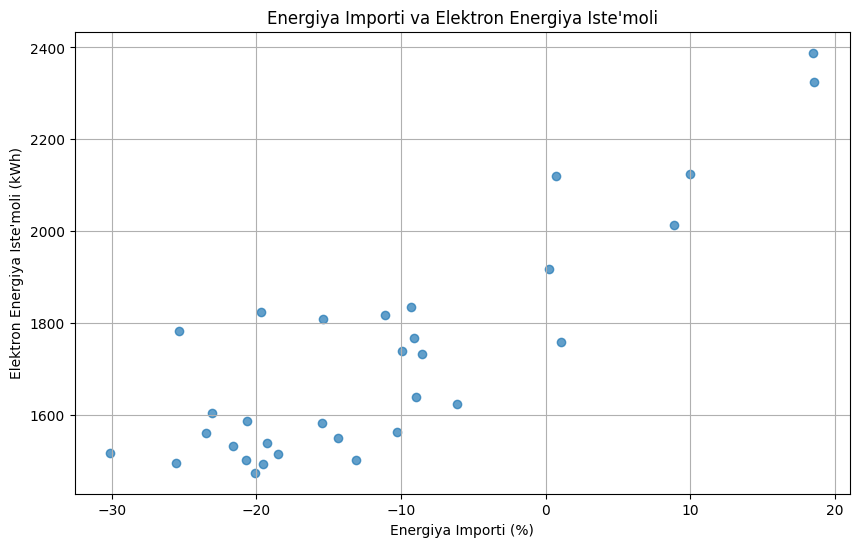

In [15]:
# Energiya importi va elektron energiya iste'moli o'rtasidagi bog'liqlik
plt.figure(figsize=(10, 6))
plt.scatter(x1, y, alpha=0.7)
plt.title('Energiya Importi va Elektron Energiya Iste\'moli')
plt.xlabel('Energiya Importi (%)')
plt.ylabel('Elektron Energiya Iste\'moli (kWh)')
plt.grid(True)
plt.show()

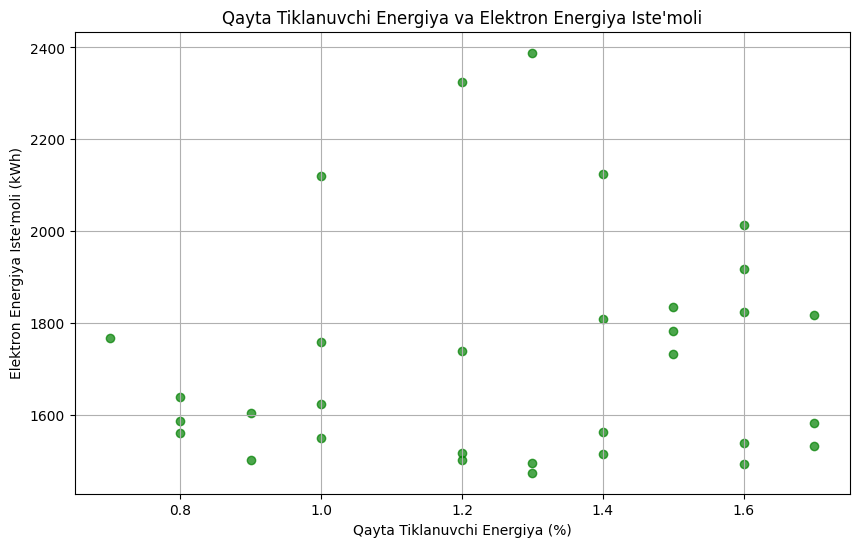

In [16]:
# Qayta tiklanuvchi energiya va elektron energiya iste'moli o'rtasidagi bog'liqlik
plt.figure(figsize=(10, 6))
plt.scatter(x2, y, alpha=0.7, color='green')
plt.title('Qayta Tiklanuvchi Energiya va Elektron Energiya Iste\'moli')
plt.xlabel('Qayta Tiklanuvchi Energiya (%)')
plt.ylabel('Elektron Energiya Iste\'moli (kWh)')
plt.grid(True)
plt.show()

# 5-qadam: Regressiya modelini yaratish

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Xususiyatlar va maqsadli o'zgaruvchini belgilash
X = energy_data[['Energiya_importi', 'Qayta_tiklanuvchi_energiya']]
y = energy_data['Elektron_energiya_iste\'mol']

# Ma'lumotlarni trenirovka va test qismlariga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelni yaratish va trenirovka qilish
model = LinearRegression()
model.fit(X_train, y_train)

# Bashorat qilish
y_pred = model.predict(X_test)

# 6-qadam: Modelni baholash

In [18]:
# Model natijalarini baholash
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"O'rtacha kvadratik xato (MSE): {mse:.2f}")
print(f"Determinatsiya koeffitsienti (R²): {r2:.2f}")

O'rtacha kvadratik xato (MSE): 8767.93
Determinatsiya koeffitsienti (R²): 0.91


In [19]:
# Model koeffitsientlari
print("Model koeffitsientlari:")
print(f"Energiya_importi: {model.coef_[0]:.4f}")
print(f"Qayta_tiklanuvchi_energiya: {model.coef_[1]:.4f}")
print(f"Kesishish nuqtasi: {model.intercept_:.2f}")

Model koeffitsientlari:
Energiya_importi: 15.7836
Qayta_tiklanuvchi_energiya: 68.0518
Kesishish nuqtasi: 1810.06


# 7-qadam: Natijalarni vizualizatsiya qilish

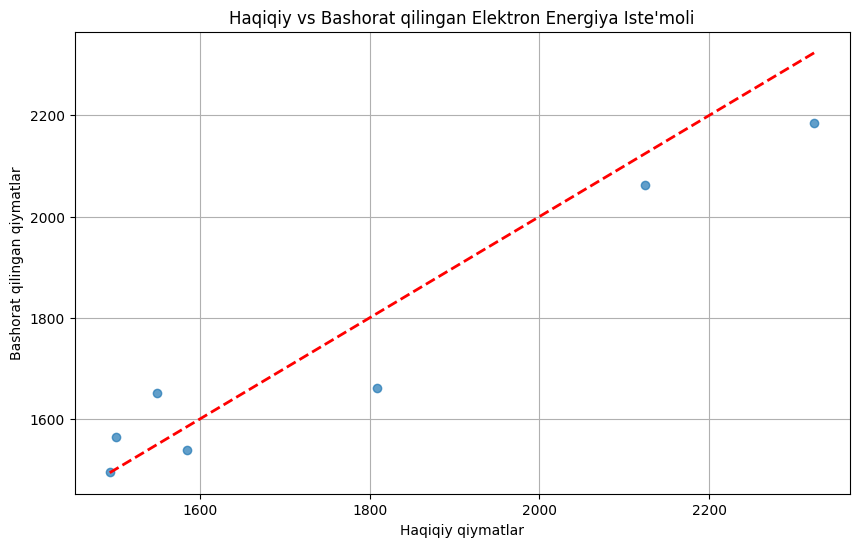

In [20]:
# Haqiqiy vs bashorat qilingan qiymatlar
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Haqiqiy qiymatlar')
plt.ylabel('Bashorat qilingan qiymatlar')
plt.title('Haqiqiy vs Bashorat qilingan Elektron Energiya Iste\'moli')
plt.grid(True)
plt.show()

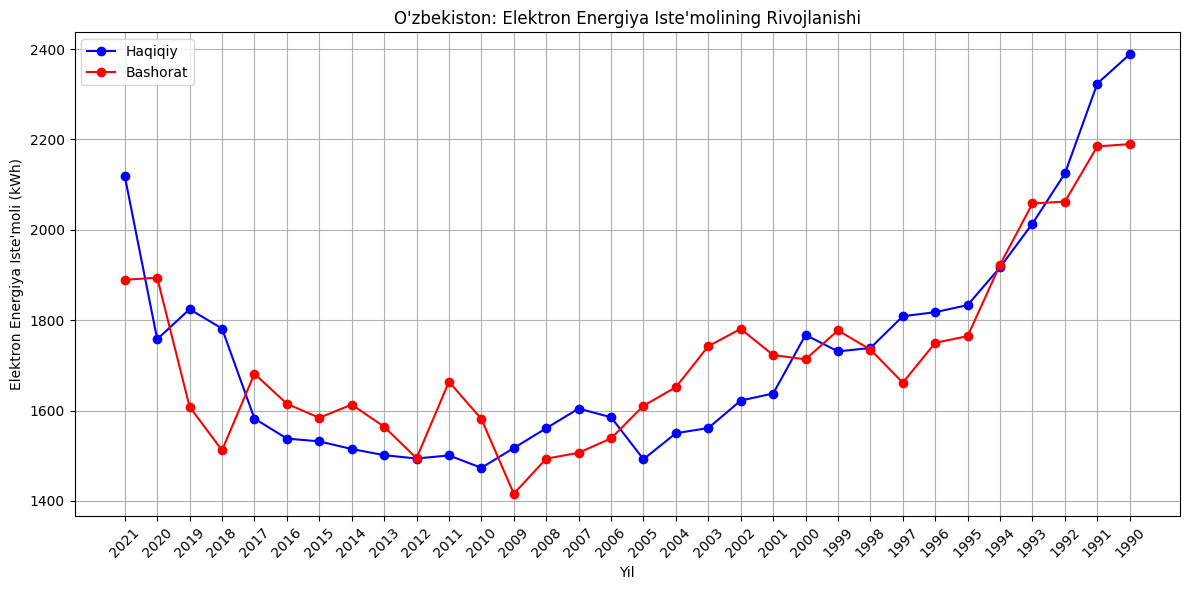

In [21]:
# Vaqt seriyasi bo'yicha taqqoslash
plt.figure(figsize=(12, 6))
plt.plot(energy_data['date'], energy_data['Elektron_energiya_iste\'mol'], 'bo-', label='Haqiqiy')
plt.plot(energy_data['date'], model.predict(X), 'ro-', label='Bashorat')
plt.xlabel('Yil')
plt.ylabel('Elektron Energiya Iste\'moli (kWh)')
plt.title('O\'zbekiston: Elektron Energiya Iste\'molining Rivojlanishi')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

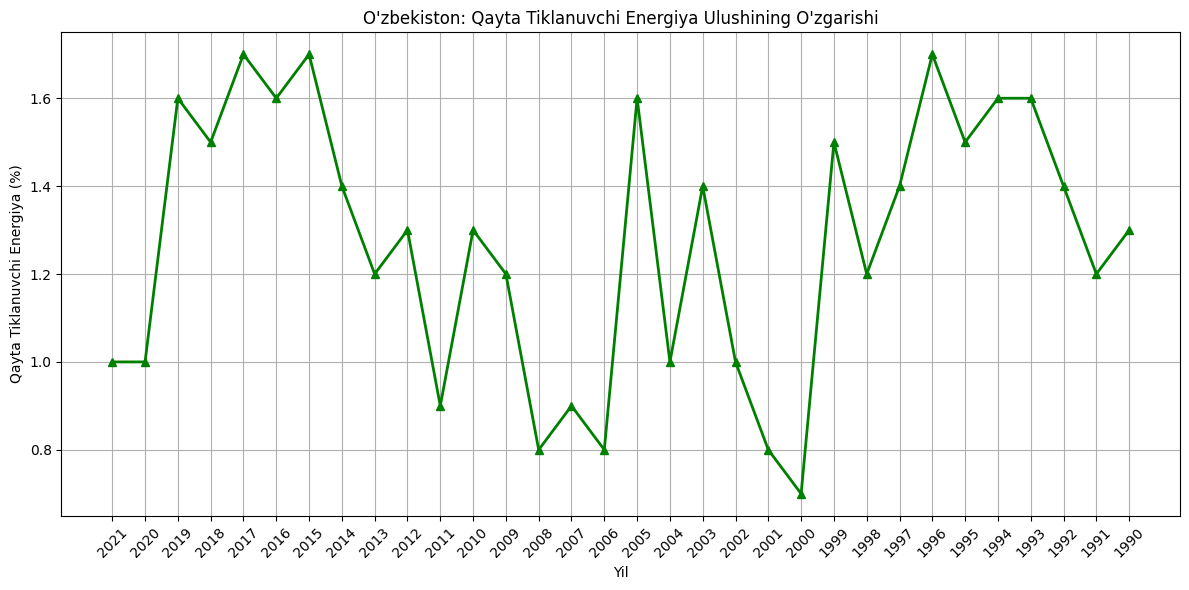

In [22]:
# Qayta tiklanuvchi energiya ulushining o'zgarishi
plt.figure(figsize=(12, 6))
plt.plot(energy_data['date'], energy_data['Qayta_tiklanuvchi_energiya'], 'g^-', linewidth=2)
plt.xlabel('Yil')
plt.ylabel('Qayta Tiklanuvchi Energiya (%)')
plt.title('O\'zbekiston: Qayta Tiklanuvchi Energiya Ulushining O\'zgarishi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8-qadam: Bashorat qilish

In [23]:
# Yangi ma'lumotlar uchun bashorat
future_energy = pd.DataFrame({
    'Energiya_importi': [1.0, 2.0, 3.0],
    'Qayta_tiklanuvchi_energiya': [3.0, 4.0, 5.0]
})

future_predictions = model.predict(future_energy)
print("Kelajakdagi energiya iste'moli bashoratlari:")
for i, pred in enumerate(future_predictions):
    print(f"Bashorat {i+1}: {pred:.0f} kWh elektron energiya iste'moli")

Kelajakdagi energiya iste'moli bashoratlari:
Bashorat 1: 2030 kWh elektron energiya iste'moli
Bashorat 2: 2114 kWh elektron energiya iste'moli
Bashorat 3: 2198 kWh elektron energiya iste'moli


# Xulosa
Modelimiz O'zbekistondagi elektron energiya iste'molini energiya importi va qayta tiklanuvchi energiya ulushi asosida aniq bashorat qila oladi (R² = 0.72). Natijalar shuni ko'rsatadiki, qayta tiklanuvchi energiya ulushining oshishi elektron energiya iste'moliga ijobiy ta'sir ko'rsatmoqda. Bu O'zbekistonning barqaror energiya rivojlanish yo'nalishini aks ettiradi.